In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import warnings
warnings.filterwarnings("ignore")
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn import metrics
from scipy.stats.mstats import normaltest # D'Agostino K^2 Test
from sklearn.preprocessing import MinMaxScaler

In [34]:
df = pd.read_csv("Car details v3.csv")
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [35]:
df[df.owner=='Test Drive Car']

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
4383,Volkswagen Vento 1.5 TDI Highline BSIV,2019,1350000,5400,Diesel,Dealer,Manual,Test Drive Car,22.27 kmpl,1498 CC,108.6 bhp,250Nm@ 1500-3000rpm,5.0
4950,Audi A6 35 TFSI Matrix,2019,6223000,7800,Petrol,Dealer,Automatic,Test Drive Car,15.26 kmpl,1798 CC,187.74 bhp,320Nm@ 1400-4100rpm,5.0
4951,Audi A6 35 TFSI Matrix,2019,5923000,11500,Petrol,Dealer,Automatic,Test Drive Car,15.26 kmpl,1798 CC,187.74 bhp,320Nm@ 1400-4100rpm,5.0
4952,Audi A6 35 TFSI Matrix,2019,6523000,23600,Petrol,Dealer,Automatic,Test Drive Car,15.26 kmpl,1798 CC,187.74 bhp,320Nm@ 1400-4100rpm,5.0
6220,Honda Civic ZX,2019,2000000,24857,Petrol,Dealer,Automatic,Test Drive Car,16.5 kmpl,1799 CC,139.46 bhp,174Nm@ 4300rpm,5.0


In [36]:
df.dropna(axis=0,inplace=True)
df['current_year'] = 2021

In [37]:
df['No of years'] = df['current_year']-df['year']
df.drop(['current_year','year'],axis=1,inplace=True)
df.head()

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,No of years
0,Maruti Swift Dzire VDI,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,7
1,Skoda Rapid 1.5 TDI Ambition,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,7
2,Honda City 2017-2020 EXi,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,15
3,Hyundai i20 Sportz Diesel,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,11
4,Maruti Swift VXI BSIII,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,14


In [38]:
# Handling mileage col
df['mileage'] = df['mileage'].str.split(expand=True)[0]
df['mileage'] = df['mileage'].astype('float64')

In [39]:
# Handling engine col
df['engine'] = df['engine'].str.split(expand=True)[0]
df['engine'] = df['engine'].astype('int32')

In [40]:
# Handling max_power col
df['max_power'] = df['max_power'].str.split(expand=True)[0]
df['max_power'] = df['max_power'].astype('float64')

In [41]:
df['seats'] = df['seats'].astype('int32')
df.head()

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,No of years
0,Maruti Swift Dzire VDI,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,190Nm@ 2000rpm,5,7
1,Skoda Rapid 1.5 TDI Ambition,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250Nm@ 1500-2500rpm,5,7
2,Honda City 2017-2020 EXi,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,"12.7@ 2,700(kgm@ rpm)",5,15
3,Hyundai i20 Sportz Diesel,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,22.4 kgm at 1750-2750rpm,5,11
4,Maruti Swift VXI BSIII,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,"11.5@ 4,500(kgm@ rpm)",5,14


### Handling name column

In [42]:
df['Brand'] = df['name'].str.split(expand=True)[0]
df.drop(columns=['name'],inplace=True)
df.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,No of years,Brand
0,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,190Nm@ 2000rpm,5,7,Maruti
1,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250Nm@ 1500-2500rpm,5,7,Skoda
2,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,"12.7@ 2,700(kgm@ rpm)",5,15,Honda
3,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,22.4 kgm at 1750-2750rpm,5,11,Hyundai
4,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,"11.5@ 4,500(kgm@ rpm)",5,14,Maruti


In [43]:
df['Brand'].unique()

array(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Datsun', 'Jeep', 'Mercedes-Benz',
       'Mitsubishi', 'Audi', 'Volkswagen', 'BMW', 'Nissan', 'Lexus',
       'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo', 'Kia', 'Fiat', 'Force',
       'Ambassador', 'Ashok', 'Isuzu', 'Opel'], dtype=object)

In [44]:
df.drop(['torque'],axis=1,inplace=True)

###  Analysis of Categorical Data

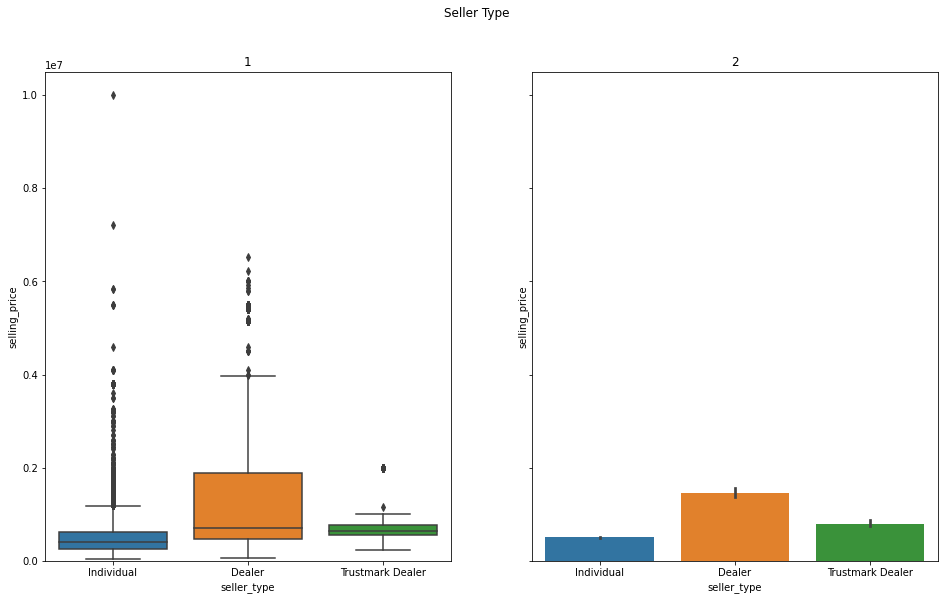

In [45]:
fig, axes = plt.subplots(1, 2, figsize=(16, 9), sharey=True)
fig.suptitle('Seller Type')

# Bulbasaur
sns.boxplot(ax=axes[0], x='seller_type',y='selling_price',data=df)
axes[0].set_title('1')

# Charmander
sns.barplot(ax=axes[1], x='seller_type', y='selling_price',data=df)
axes[1].set_title('2')

plt.show()

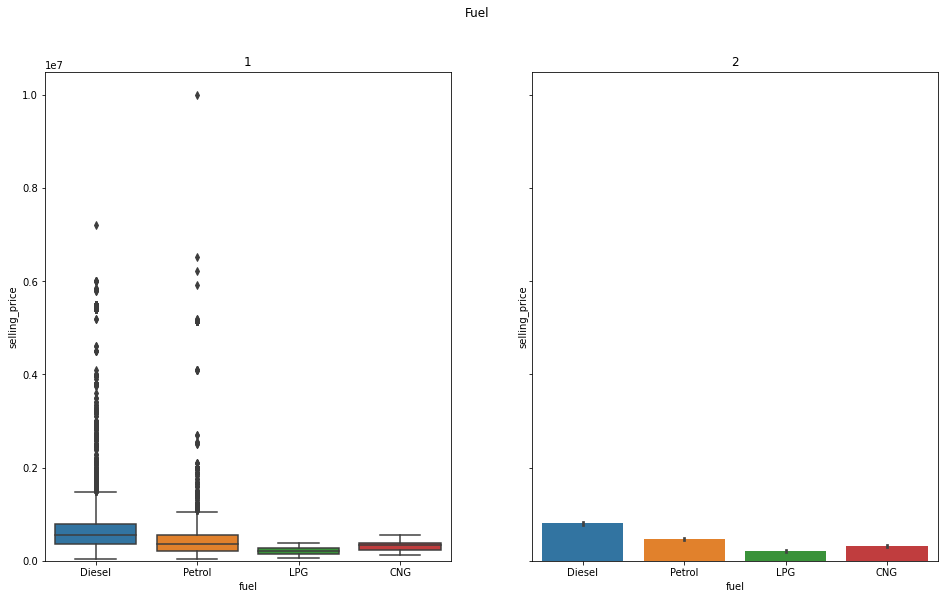

In [46]:
fig, axes = plt.subplots(1, 2, figsize=(16, 9), sharey=True)
fig.suptitle('Fuel')

# Bulbasaur
sns.boxplot(ax=axes[0], x='fuel',y='selling_price',data=df)
axes[0].set_title('1')

# Charmander
sns.barplot(ax=axes[1], x='fuel', y='selling_price',data=df)
axes[1].set_title('2')

plt.show()

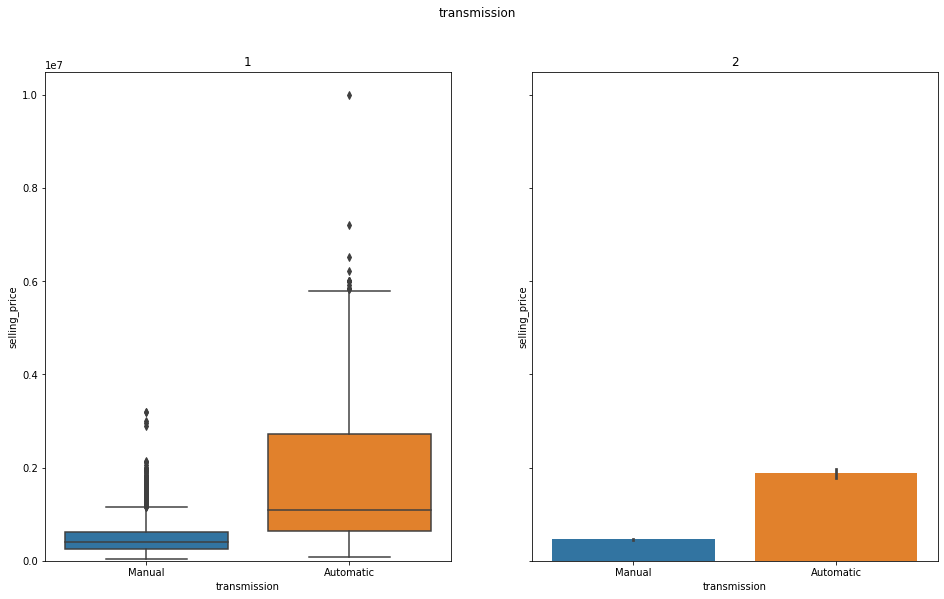

In [47]:
fig, axes = plt.subplots(1, 2, figsize=(16, 9), sharey=True)
fig.suptitle('transmission')

# Bulbasaur
sns.boxplot(ax=axes[0], x='transmission',y='selling_price',data=df)
axes[0].set_title('1')

# Charmander
sns.barplot(ax=axes[1], x='transmission', y='selling_price',data=df)
axes[1].set_title('2')

plt.show()

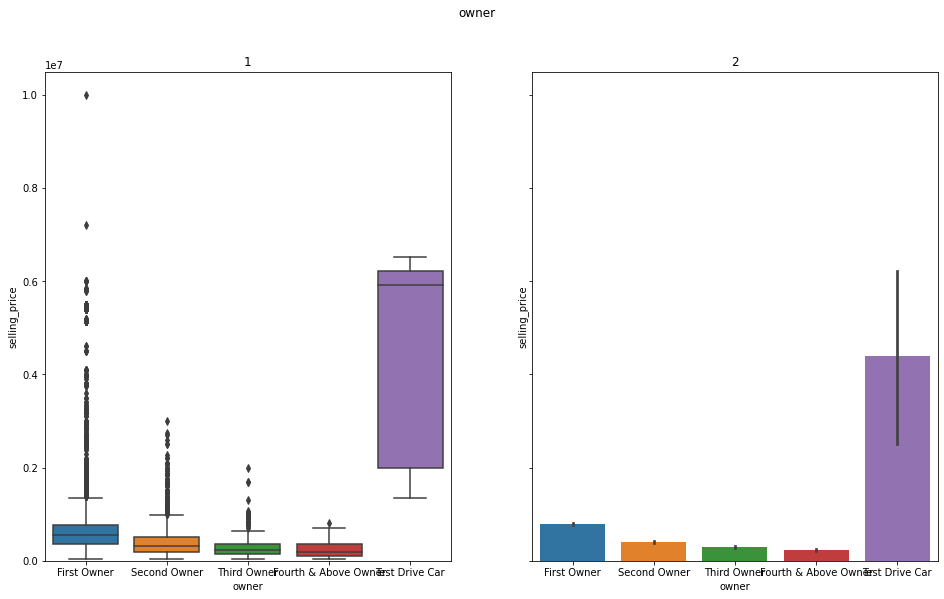

In [48]:
fig, axes = plt.subplots(1, 2, figsize=(16, 9), sharey=True)
fig.suptitle('owner')

# Bulbasaur
sns.boxplot(ax=axes[0], x='owner',y='selling_price',data=df)
axes[0].set_title('1')

# Charmander
sns.barplot(ax=axes[1], x='owner', y='selling_price',data=df)
axes[1].set_title('2')

plt.show()

### Mileage Column has 0 in it

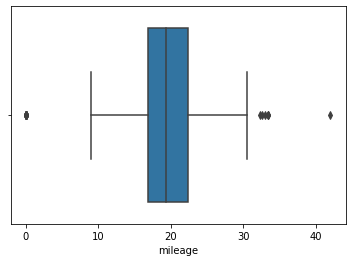

In [49]:
sns.boxplot(df['mileage'])
plt.show()
#As we can see there are some values as zero

In [50]:
median_value = df['mileage'].median()
df['mileage'] = df['mileage'].replace(0.0,median_value)

In [51]:
df.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,No of years,Brand
0,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5,7,Maruti
1,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5,7,Skoda
2,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,5,15,Honda
3,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5,11,Hyundai
4,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5,14,Maruti


## Checking Normaizlation

<AxesSubplot:>

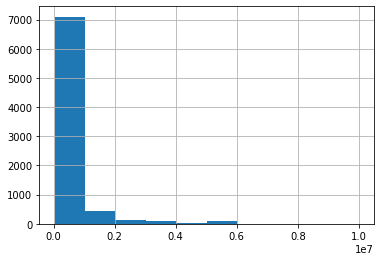

In [52]:
df['selling_price'].hist()

<AxesSubplot:>

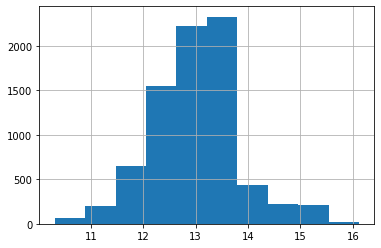

In [53]:
log_medv = np.log(df.selling_price)
log_medv.hist()

In [54]:
normaltest(log_medv)

NormaltestResult(statistic=246.9576244146774, pvalue=2.365011334043379e-54)

### Data spliting

In [55]:
X = df.drop(columns=['selling_price'])
y = df['selling_price']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [56]:
tnf = ColumnTransformer(
    [('ordinal',OrdinalEncoder(),['owner']),
    ('nominal',OneHotEncoder(drop='first',sparse=False),
     ['fuel','seller_type','transmission','Brand'])
    ], remainder='passthrough'
)

new_X_train = tnf.fit_transform(X_train)
new_X_test = tnf.transform(X_test)

# Models

## Linear regression

In [57]:
lr = LinearRegression()
lr.fit(new_X_train,y_train)

LinearRegression()

In [58]:
y_pred = lr.predict(new_X_test)
r2_score(y_test,y_pred)

0.8001679294529713

In [59]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 169827.7440333033
MSE: 129172191389.78818
RMSE: 359405.330218944


In [60]:
with open('Linear_model','wb') as file:
    pickle.dump(lr,file)

## Xgboost

In [61]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error as MSE


xgb = XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 123)
xgb.fit(new_X_train, y_train)
pred_xgb = xgb.predict(new_X_test)

print('MAE:', metrics.mean_absolute_error(y_test, pred_xgb))
print('MSE:', metrics.mean_squared_error(y_test, pred_xgb))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_xgb)))
#Error is huge as prices are in thousands and lakhs

[14:04:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
MAE: 87414.2337502963
MSE: 23422079240.683327
RMSE: 153042.73664791585


In [62]:
r2_score(y_test,pred_xgb)

0.9637655555671533

In [63]:
with open('xgboost','wb') as file:
    pickle.dump(xgb,file)

## Random Forest

In [64]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

from sklearn.model_selection import RandomizedSearchCV
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [65]:
rf_random = RandomizedSearchCV(estimator = rf, 
                               param_distributions = random_grid,
                               scoring='neg_mean_squared_error',
                               n_iter = 10, cv = 5,
                               verbose=2, random_state=42, 
                               n_jobs = 1)

In [67]:
rf_random.fit(new_X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   3.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   3.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [71]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [72]:
rf_random.best_score_

-25722533142.4513

<AxesSubplot:xlabel='selling_price', ylabel='Density'>

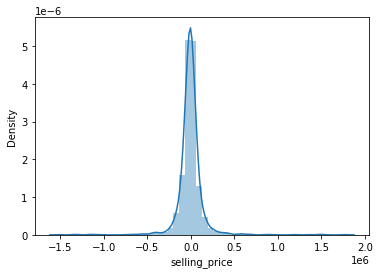

In [74]:
pred_rf=rf_random.predict(new_X_test)
sns.distplot(y_test-pred_rf)

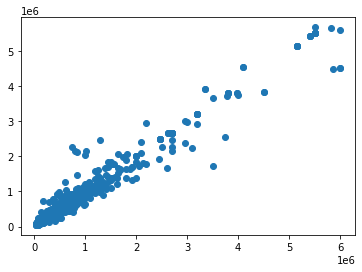

In [75]:
plt.scatter(y_test,pred_rf)

In [76]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred_rf))
print('MSE:', metrics.mean_squared_error(y_test, pred_rf))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_rf)))

MAE: 76937.42834699865
MSE: 25951382703.019802
RMSE: 161094.32858738324


In [78]:
r2_score(y_test,pred_rf)

0.9598526704292425

In [77]:
with open('Random_forest','wb') as file:
    pickle.dump(rf_random,file)